In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Optional, Union, List, Dict
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Load historical datasets

aapl_df = pd.read_csv("../data/yfinance_data/AAPL_historical_data.csv")
amzn_df = pd.read_csv("../data/yfinance_data/AMZN_historical_data.csv")
goog_df = pd.read_csv("../data/yfinance_data/GOOG_historical_data.csv")
meta_df = pd.read_csv("../data/yfinance_data/META_historical_data.csv")
msft_df = pd.read_csv("../data/yfinance_data/MSFT_historical_data.csv")
nvda_df = pd.read_csv("../data/yfinance_data/NVDA_historical_data.csv")
tsla_df = pd.read_csv("../data/yfinance_data/TSLA_historical_data.csv")

In [32]:
aapl_df['Date'] = pd.to_datetime(aapl_df['Date'])
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'])
goog_df['Date'] = pd.to_datetime(goog_df['Date'])
meta_df['Date'] = pd.to_datetime(meta_df['Date'])
msft_df['Date'] = pd.to_datetime(msft_df['Date'])
nvda_df['Date'] = pd.to_datetime(nvda_df['Date'])
tsla_df['Date'] = pd.to_datetime(tsla_df['Date'])

In [158]:
# Load raw analyst ratings dataset

raw_df = pd.read_csv("../data/raw_analyst_ratings.csv")

In [220]:
raw_df.sample(5)

,Unnamed: 0,headline,url,publisher,date,stock
1002488,1007487,Earnings Expectations for the Week of October 15,https://www.benzinga.com/news/earnings/12/10/2...,Nelson Hem,2012-10-15 00:00:00,PH
1262435,1268424,"Canaccord Genuity Maintains Buy on Tetra Tech,...",https://www.benzinga.com/news/18/08/12138056/c...,Vick Meyer,2018-08-03 00:00:00,TTEK
883643,888142,NBT Bancorp Reports Q4 EPS $0.34 vs. Est. $0.43,https://www.benzinga.com/news/earnings/16/01/6...,Hal Lindon,2016-01-25 00:00:00,NBTB
380006,382072,Digital River Reports EPS $0.31 vs. $0.29 Est....,https://www.benzinga.com/news/earnings/11/04/1...,Benzinga Staff,2011-04-28 00:00:00,DRIV
622395,625598,UPDATE: Starwood Hotels & Resorts Worldwide Mo...,https://www.benzinga.com/trading-ideas/long-id...,Eddie Staley,2011-11-02 00:00:00,HOT


In [221]:
raw_df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29 00:00:00,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22 00:00:00,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21 00:00:00,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21 00:00:00,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12 00:00:00,ZX


In [222]:
# works but removes timestamp

from dateutil import parser

def force_naive_parse(x):
    try:
        dt = parser.parse(x)
        return dt.replace(tzinfo=None) if dt.tzinfo else dt  # drop timezone if present
    except Exception:
        return pd.NaT

# Step 1: Parse and strip any timezone info
raw_df['date'] = raw_df['date'].astype(str).apply(force_naive_parse)

# Step 2: Convert to pandas-native datetime64[ns]
raw_df['date'] = pd.to_datetime(raw_df['date'], errors='coerce')


In [223]:
print(raw_df['date'].dtype) 

datetime64[ns]


In [224]:
raw_df.head(5)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59,A


In [132]:
raw_df.tail()

,Unnamed: 0,headline,url,publisher,date,stock
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,2011-08-29,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,2011-06-22,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,2011-06-21,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,2011-06-21,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,2011-05-12,ZX


In [225]:
# Add headline length column
raw_df['headline_length'] = raw_df['headline'].apply(len)

In [226]:
# Describe the headline lengths
raw_df['headline_length'].describe()

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

In [227]:
# Count the number of unique publishers
num_publishers = raw_df['publisher'].nunique()
print(f"Number of unique publishers: {num_publishers}")

Number of unique publishers: 1034


In [228]:
# show top 10 publishers

top_publishers = raw_df['publisher'].value_counts().head(10)
print(top_publishers)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


Analyze Publication Dates

In [229]:
# Extract date
raw_df['pub_date'] = raw_df['date'].dt.date

# Extract and weekday
raw_df['weekday'] = raw_df['date'].dt.day_name()

# Articles by date
articles_by_day = raw_df['pub_date'].value_counts().sort_index()

# Articles by weekday
articles_by_weekday = raw_df['weekday'].value_counts()

print(articles_by_day.tail())
print(articles_by_weekday)

pub_date
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, dtype: int64
weekday
Thursday     302595
Wednesday    300940
Tuesday      296470
Monday       265164
Friday       217892
Sunday        16514
Saturday       7753
Name: count, dtype: int64


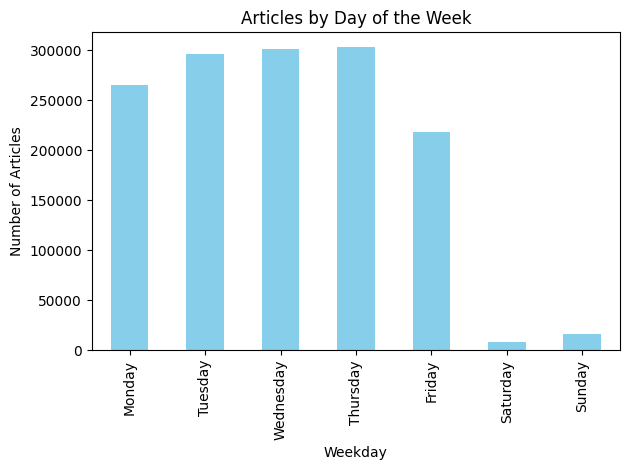

In [231]:
articles_by_weekday = raw_df['weekday'].value_counts().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

articles_by_weekday.plot(kind='bar', title="Articles by Day of the Week", color='skyblue')
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.tight_layout()
plt.show()

Text Analysis(Topic Modeling)

In [232]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [233]:
# Preprocess: lowercase and drop NaNs
headlines = raw_df['headline'].dropna().str.lower()

# Use both unigrams (1 word) and bigrams (2 words)
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),        # capture both single and two-word phrases
    max_features=1000,         # tune as needed
    min_df=10
)

X = vectorizer.fit_transform(headlines)
terms = vectorizer.get_feature_names_out()

In [234]:
# Get overall importance (sum of TF-IDF scores across all documents)
scores = X.sum(axis=0).A1
keywords_df = pd.DataFrame({'phrase': terms, 'score': scores})
keywords_df = keywords_df.sort_values(by='score', ascending=False)

# Preview top phrases
print(keywords_df.head(20))


         phrase         score
865      stocks  36116.149417
956          vs  28734.962193
537      market  27570.889006
340         est  26079.876409
763     reports  25168.015676
320    earnings  24810.640153
827      shares  24638.434767
177    benzinga  23853.135744
936      update  23321.745749
333         eps  23144.395771
155   announces  21033.585610
314  downgrades  20969.035129
942    upgrades  20387.377488
208         buy  19400.464275
969        week  18120.807202
701          pt  18075.250157
788       sales  17054.296942
791        says  16315.614811
604         new  15074.148045
727      raises  15067.901262


Time Series Analysis

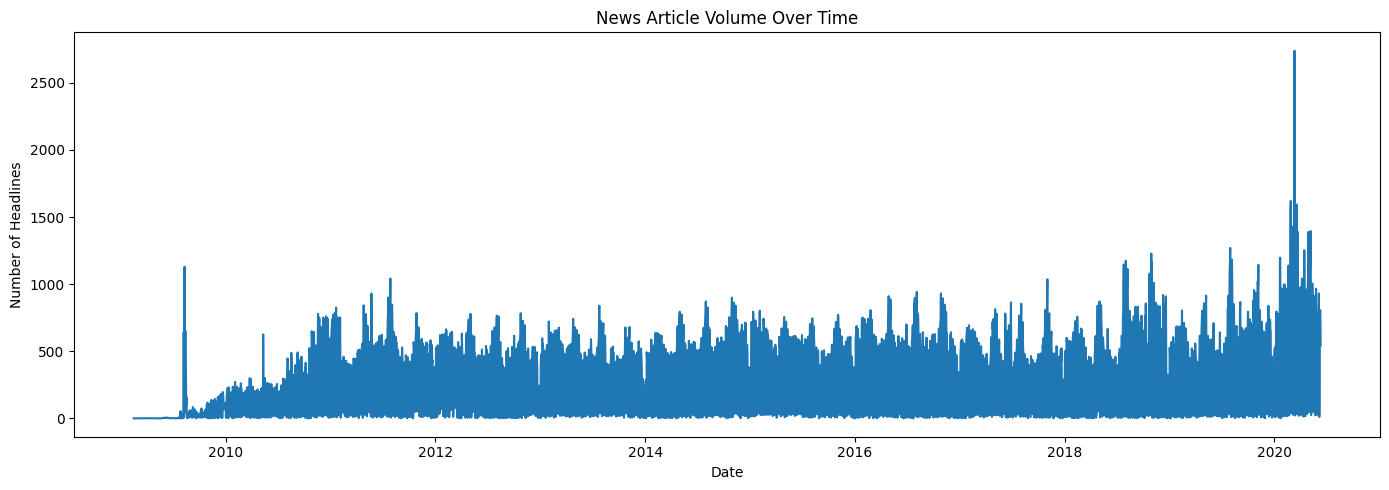

In [235]:
# Group Headlines by Date
# Extract just the date (not datetime)
raw_df['pub_date'] = raw_df['date'].dt.date

# Count articles published per day
daily_counts = raw_df['pub_date'].value_counts().sort_index()
plt.figure(figsize=(14, 5))
daily_counts.plot(kind='line')
plt.title("News Article Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Headlines")
plt.tight_layout()
plt.show()

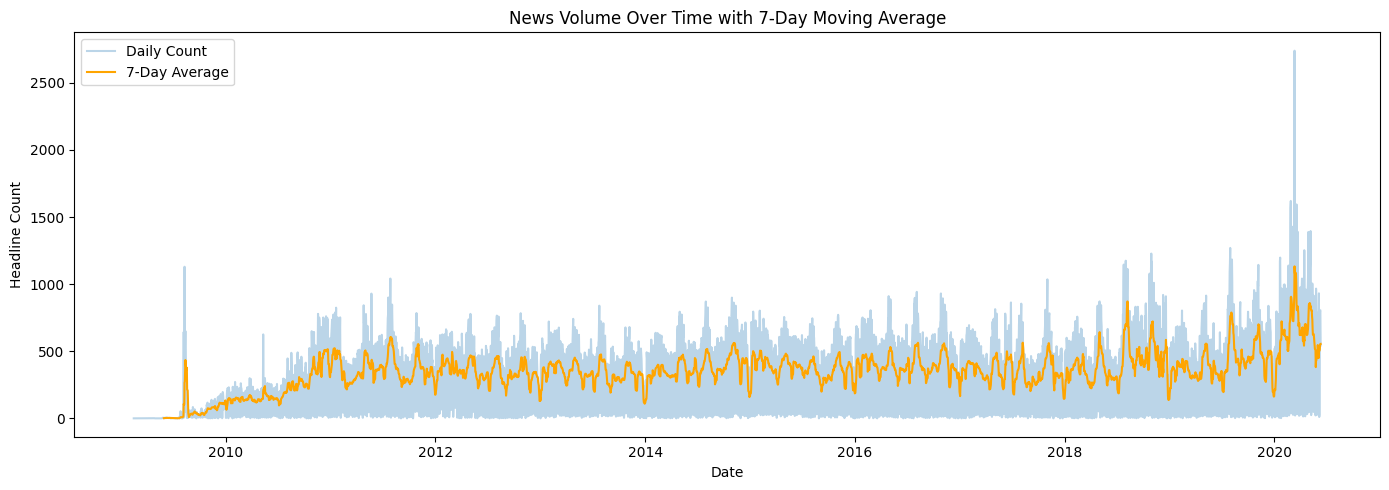

In [236]:
daily_counts_smoothed = daily_counts.rolling(window=7).mean()  # 7-day moving average

plt.figure(figsize=(14, 5))
plt.plot(daily_counts.index, daily_counts, label='Daily Count', alpha=0.3)
plt.plot(daily_counts_smoothed.index, daily_counts_smoothed, label='7-Day Average', color='orange')
plt.title("News Volume Over Time with 7-Day Moving Average")
plt.xlabel("Date")
plt.ylabel("Headline Count")
plt.legend()
plt.tight_layout()
plt.show()

In [237]:
# Extract hour from datetime
raw_df['hour'] = raw_df['date'].dt.hour

In [238]:
hourly_counts = raw_df['hour'].value_counts().sort_index()

# Optional: Normalize to percentages
hourly_percent = (hourly_counts / hourly_counts.sum()) * 100

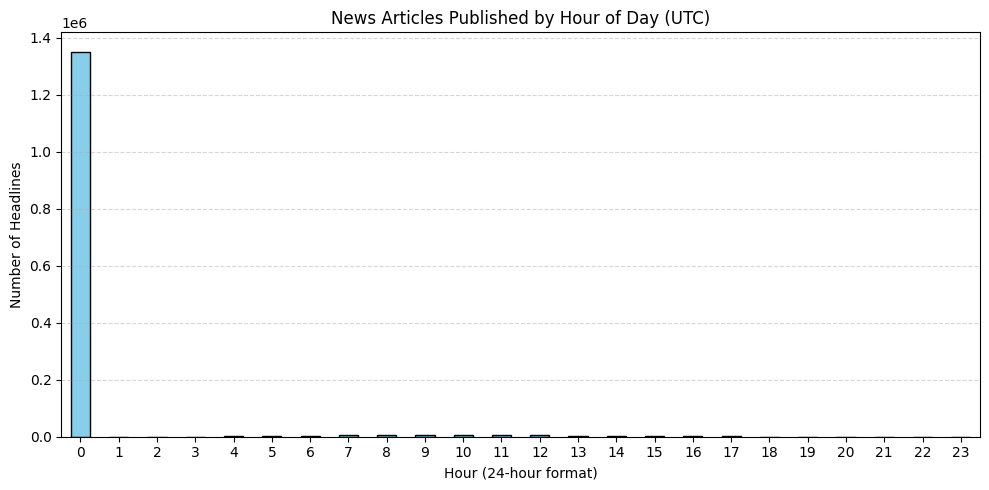

In [239]:
plt.figure(figsize=(10, 5))
hourly_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("News Articles Published by Hour of Day (UTC)")
plt.xlabel("Hour (24-hour format)")
plt.ylabel("Number of Headlines")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Filter Out Publishers That Look Like Emails

In [240]:
email_mask = raw_df['publisher'].str.contains(r'@', na=False)
email_publishers = raw_df[email_mask].copy()
email_publishers['domain'] = email_publishers['publisher'].str.extract(r'@([\w\.-]+)')
domain_counts = email_publishers['domain'].value_counts()
print(domain_counts.head(10))  # Top 10 contributing domains

domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64
